# PCA+SVM vs. LDA: Fisher Iris Classification  
Load data then split into training and testing with stratify.

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Reference: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

iris = datasets.load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

Perform PCA and LDA, then compare the 2D results.

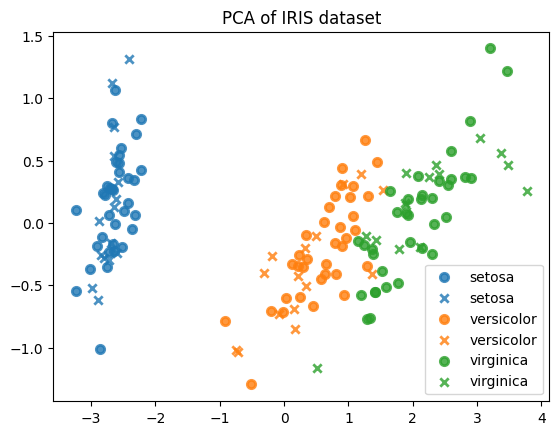

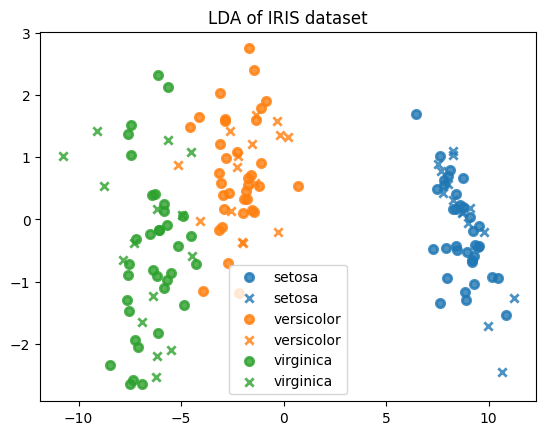

In [2]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train,y_train)
X_test_pca = pca.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

# PCA Results
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], 
                color=color, alpha=0.8, lw=2, label=target_name)
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], 
                color=color, alpha=0.8, lw=2, label=target_name, marker='x')
    
plt.legend(loc="best", shadow=False)
plt.title("PCA of IRIS dataset")
plt.show()

# LDA Results
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], 
                color=color, alpha=0.8, lw=2, label=target_name)
    plt.scatter(X_test_lda[y_test == i, 0], X_test_lda[y_test == i, 1], 
                color=color, alpha=0.8, lw=2, label=target_name, marker='x')
    
plt.legend(loc="best", shadow=False)
plt.title("LDA of IRIS dataset")
plt.show()

## LDA Classification Results
Check the accuracy of LDA on training and testing data.

In [3]:
print(f"Training Accuracy: {lda.score(X_train,y_train)}")
print(f"Testing Accuracy: {lda.score(X_test,y_test)}")

print('Training: Confusion Matrix')
print(confusion_matrix(y_train, lda.predict(X_train)))
print('Testing: Confusion Matrix')
print(confusion_matrix(y_test, lda.predict(X_test)))

Training Accuracy: 0.9904761904761905
Testing Accuracy: 0.9555555555555556
Training: Confusion Matrix
[[35  0  0]
 [ 0 34  1]
 [ 0  0 35]]
Testing: Confusion Matrix
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


## PCA+SVM Classification Results
Perform SVM on PCA scores, then report accuracies.

In [4]:
svm_mdl = SVC().fit(X_train,y_train)
print(f"Training Accuracy: {svm_mdl.score(X_train,y_train)}")
print(f"Testing Accuracy: {svm_mdl.score(X_test,y_test)}")

print('Training: Confusion Matrix')
print(confusion_matrix(y_train, svm_mdl.predict(X_train)))
print('Testing: Confusion Matrix')
print(confusion_matrix(y_test, svm_mdl.predict(X_test)))

Training Accuracy: 0.9809523809523809
Testing Accuracy: 0.9333333333333333
Training: Confusion Matrix
[[35  0  0]
 [ 0 35  0]
 [ 0  2 33]]
Testing: Confusion Matrix
[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
